In [1]:
import pm4py
import processmining.log.ocel as ocelhelper

In [2]:
file_path = '../data/runningExample.jsonocel'

In [3]:
ocel = pm4py.read.read_ocel2_json(file_path)

# Discovering OC_DFG
Let’s start by discovering the Object-Centric Directly-Follows Graph (OC-DFG) from the provided example event log. At this level of granularity, the order in which tests are conducted cannot be identified because the representation is too coarse. This limitation highlights the need for more granular process analysis.

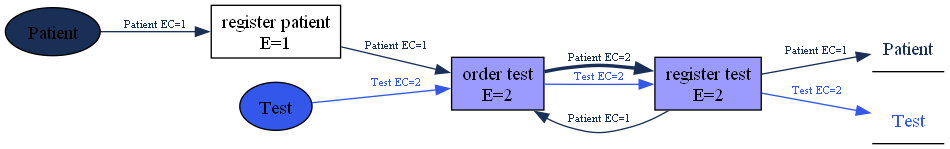

In [4]:
ocdfg = pm4py.discover_ocdfg(ocel)
pm4py.view_ocdfg(ocdfg, annotation='frequency', format='png')

# Drill-in Operation
To address the coarse level of abstraction, we can perform a drill-down operation on the OCEL, focusing on specific attributes such as test types. This operation provides a more detailed view of the process. However, even at this level of detail, the sequence of tests remains obscured because all tests are treated equivalently from a control-flow perspective. To resolve this, we can apply an unfold operation.

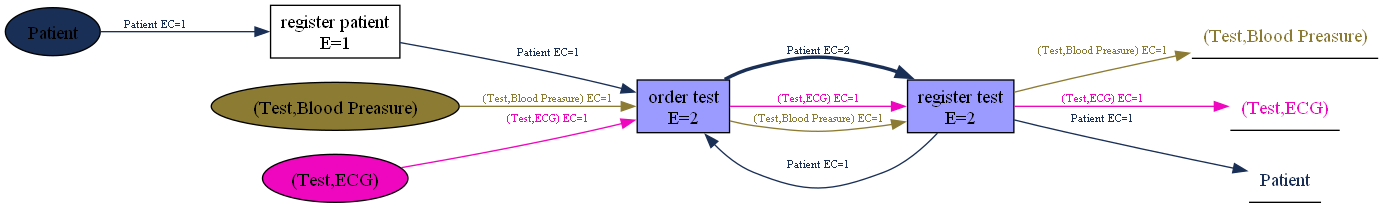

In [5]:
drilled_down_ocel = ocelhelper.drill_down(ocel, 'Test', 'Type')
drilled_down_ocdfg = pm4py.discover_ocdfg(drilled_down_ocel)
pm4py.view_ocdfg(drilled_down_ocdfg, annotation='frequency', format='png')

# Unfold Operation
By applying the unfold operation, we can transform the event log to differentiate between various test types explicitly. This transformation reveals the hidden sequential procedure, making the order of tests clear and preserving their unique identities in the process model.

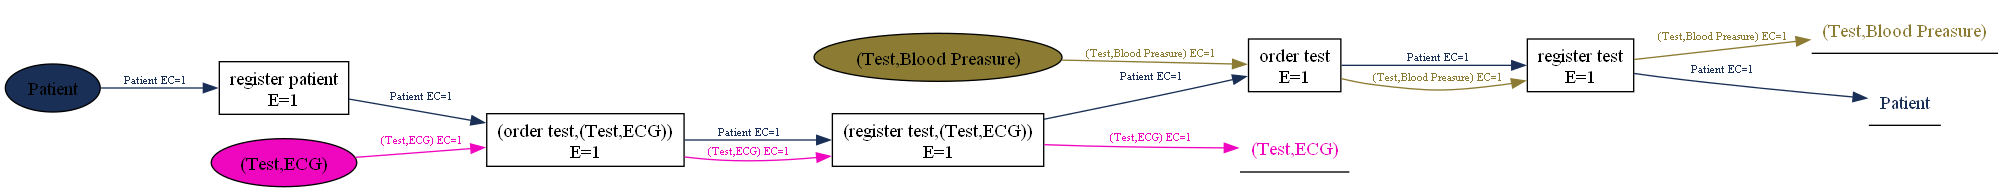

In [6]:
ots = ['(Test,ECG)','(Test,Blood)']
unfolded_ocel=drilled_down_ocel
etypes = ['order test', 'register test']

for ot in ots:
    for et in etypes:
        unfolded_ocel = ocelhelper.unfold(unfolded_ocel, et ,ot)

unfolded_ocdfg = pm4py.discover_ocdfg(unfolded_ocel)
pm4py.view_ocdfg(unfolded_ocdfg, annotation='frequency', format='png')

# Fold Operation
After performing an unfold operation, the event log can be reverted back to its previous state using the fold operation. This reversibility ensures that the changes introduced are non-destructive and can be undone easily when a higher-level abstraction is needed.

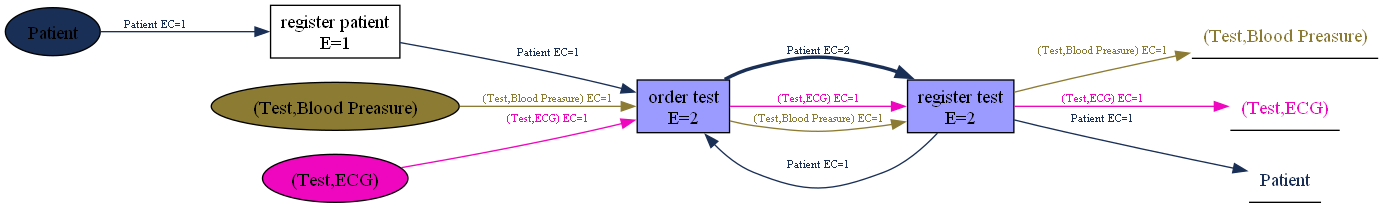

In [7]:
folded_ocel = unfolded_ocel
for ot in ots:
    for et in etypes:
        folded_ocel = ocelhelper.fold(folded_ocel, et ,ot)

folded_ocdfg = pm4py.discover_ocdfg(folded_ocel)
pm4py.view_ocdfg(folded_ocdfg, annotation='frequency', format='png')

# Roll-up Operation
Finally, the roll-up operation allows us to aggregate the event log back to its original state. This operation effectively restores the log to the initial level of abstraction, enabling the discovery of the same process model as at the beginning of the analysis.

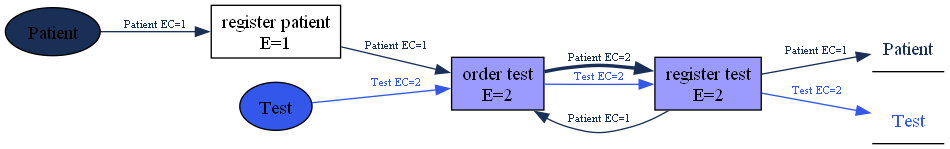

In [8]:
rolled_up_ocel = ocelhelper.roll_up(folded_ocel, 'Test', 'Type')
rolled_up_ocdfg = pm4py.discover_ocdfg(rolled_up_ocel)
pm4py.view_ocdfg(rolled_up_ocdfg, annotation='frequency', format='png')